# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
response_json = []
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
windspeed = []


# {'base': 'stations',
#  'clouds': {'all': 90},
#  'cod': 200,
#  'coord': {'lat': 49.23, 'lon': -102.17},
#  'dt': 1584294975,
#  'id': 6095751,
#  'main': {'feels_like': -14.02,
#           'humidity': 85,
#           'pressure': 1028,
#           'temp': -7.43,
#           'temp_max': -7,
#           'temp_min': -7.78},
#  'name': 'Oxbow',
#  'sys': {'country': 'CA',
#          'id': 790,
#          'sunrise': 1584277256,
#          'sunset': 1584320041,
#          'type': 1},
#  'timezone': -21600,
#  'visibility': 14484,
#  'weather': [{'description': 'light snow',
#               'icon': '13d',
#               'id': 600,
#               'main': 'Snow'}],
#  'wind': {'deg': 110, 'speed': 5.1}}

# Make a request for each of the indices
for x in range(len(cities)):
    print(f"Processing Record: {x} of Set 1| {cities[x]}")

    # Get one of the posts
    response = requests.get(query_url + str(cities[x]))

    response_json.append(response.json())
    
    try:
     name_pull = response_json[x]['name']  
     cloudiness_pull = response_json[x]['clouds']['all']
     country_pull = response_json[x]['sys']['country']
     date_pull = response_json[x]['dt']
     humidity_pull = response_json[x]['main']['humidity']
     lat_pull = response_json[x]['coord']['lat']
     long_pull = response_json[x]['coord']['lon']
     maxtemp_pull = response_json[x]['main']['temp_max']
     wind_pull = response_json[x]['wind']['speed']

     name.append(name_pull)
     cloudiness.append(cloudiness_pull)
     country.append(country_pull)
     date.append(date_pull)
     humidity.append(humidity_pull)
     lat.append(lat_pull)
     long.append(long_pull)
     max_temp.append(maxtemp_pull) 
     windspeed.append(wind_pull)
    except:
     print("Datanot found")
    pass

#     cloudiness.append(response['clouds']['all'])
#     country.append(response['sys']['country'])
#     date.append(response['dt'])
#     humidity.append(response['main']['humidity'])
#     lat.append(response['coord']['lat'])
#     long.append(response['coord']['lon'])
#     temp.append(response['main']['temp_max']) 
#     windspeed.append(response['wind']['speed'])
    
    # Save post's JSON

    
#       # Get weather data
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()

#     # Get temperature from JSON response
#     temperature = weather_json["main"]["temp"]

#     temperatures.append(temperature)
      



Processing Record: 0 of Set 1| zolotinka
Datanot found
Processing Record: 1 of Set 1| east london
Processing Record: 2 of Set 1| thompson
Processing Record: 3 of Set 1| cape town
Processing Record: 4 of Set 1| vaini
Processing Record: 5 of Set 1| neuquen
Processing Record: 6 of Set 1| adrar
Processing Record: 7 of Set 1| tomatlan
Processing Record: 8 of Set 1| amet
Processing Record: 9 of Set 1| hermanus
Processing Record: 10 of Set 1| lompoc
Processing Record: 11 of Set 1| callaguip
Processing Record: 12 of Set 1| rikitea
Processing Record: 13 of Set 1| upernavik
Processing Record: 14 of Set 1| tiksi
Processing Record: 15 of Set 1| buala
Processing Record: 16 of Set 1| qaanaaq
Processing Record: 17 of Set 1| jamestown
Processing Record: 18 of Set 1| panama city
Processing Record: 19 of Set 1| cidreira
Processing Record: 20 of Set 1| caraballeda
Processing Record: 21 of Set 1| norrtalje
Processing Record: 22 of Set 1| puerto ayacucho
Processing Record: 23 of Set 1| rancho palos verdes


Processing Record: 192 of Set 1| torbay
Processing Record: 193 of Set 1| arraial do cabo
Processing Record: 194 of Set 1| the valley
Processing Record: 195 of Set 1| naze
Processing Record: 196 of Set 1| eureka
Processing Record: 197 of Set 1| hoquiam
Processing Record: 198 of Set 1| solano
Processing Record: 199 of Set 1| sao joao da barra
Processing Record: 200 of Set 1| el obraje
Processing Record: 201 of Set 1| dezhou
Processing Record: 202 of Set 1| chapais
Processing Record: 203 of Set 1| beipiao
Processing Record: 204 of Set 1| yerbogachen
Processing Record: 205 of Set 1| menongue
Processing Record: 206 of Set 1| pachino
Processing Record: 207 of Set 1| nabire
Processing Record: 208 of Set 1| markovo
Processing Record: 209 of Set 1| rexburg
Processing Record: 210 of Set 1| pingliang
Processing Record: 211 of Set 1| sao jose da coroa grande
Processing Record: 212 of Set 1| sirjan
Processing Record: 213 of Set 1| aykhal
Processing Record: 214 of Set 1| kuvshinovo
Processing Record

Processing Record: 380 of Set 1| amuntai
Processing Record: 381 of Set 1| lakatoro
Processing Record: 382 of Set 1| andros town
Processing Record: 383 of Set 1| stavern
Processing Record: 384 of Set 1| mega
Processing Record: 385 of Set 1| noshiro
Processing Record: 386 of Set 1| san-pedro
Processing Record: 387 of Set 1| lewistown
Processing Record: 388 of Set 1| narsaq
Processing Record: 389 of Set 1| luderitz
Processing Record: 390 of Set 1| perth
Processing Record: 391 of Set 1| tsihombe
Datanot found
Processing Record: 392 of Set 1| leku
Processing Record: 393 of Set 1| havre-saint-pierre
Processing Record: 394 of Set 1| samusu
Datanot found
Processing Record: 395 of Set 1| labuhan
Processing Record: 396 of Set 1| romitan
Processing Record: 397 of Set 1| talaya
Processing Record: 398 of Set 1| kars
Processing Record: 399 of Set 1| kuandian
Processing Record: 400 of Set 1| medeiros neto
Processing Record: 401 of Set 1| grindavik
Processing Record: 402 of Set 1| itoman
Processing Re

Processing Record: 571 of Set 1| george
Processing Record: 572 of Set 1| fortuna
Processing Record: 573 of Set 1| svetlogorsk
Processing Record: 574 of Set 1| msowero
Processing Record: 575 of Set 1| ampanihy
Processing Record: 576 of Set 1| kinablangan
Processing Record: 577 of Set 1| talnakh
Processing Record: 578 of Set 1| ituni
Datanot found
Processing Record: 579 of Set 1| haguenau
Processing Record: 580 of Set 1| maceio
Processing Record: 581 of Set 1| bolungarvik
Datanot found
Processing Record: 582 of Set 1| codrington
Processing Record: 583 of Set 1| kashi
Processing Record: 584 of Set 1| aklavik
Processing Record: 585 of Set 1| belgaum
Processing Record: 586 of Set 1| bosaso
Processing Record: 587 of Set 1| bandarbeyla
Processing Record: 588 of Set 1| tezu
Processing Record: 589 of Set 1| sakakah
Processing Record: 590 of Set 1| dubenskiy
Datanot found
Processing Record: 591 of Set 1| henties bay
Processing Record: 592 of Set 1| concepcion del uruguay
Processing Record: 593 o

In [5]:
from pprint import pprint

pprint(response.json())

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 46.53, 'lon': -87.63},
 'dt': 1584496867,
 'id': 5000950,
 'main': {'feels_like': -9.47,
          'humidity': 68,
          'pressure': 1022,
          'temp': -3.97,
          'temp_max': -2,
          'temp_min': -5.56},
 'name': 'Marquette',
 'sys': {'country': 'US',
         'id': 5777,
         'sunrise': 1584446304,
         'sunset': 1584489543,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 3.6}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "Name" : name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Long" : long,
    "Max Temp" : max_temp,
    "Wind Speed" : windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)
weather_data.head(30)

,Name,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,East London,0,ZA,1584496681,76,-33.02,27.91,20.67,2.02
1,Thompson,5,CA,1584496677,44,55.74,-97.86,-18.00,2.60
2,Cape Town,26,ZA,1584496678,88,-33.93,18.42,18.33,5.70
3,Vaini,90,TO,1584496749,83,-21.20,-175.20,27.00,2.60
4,Neuquén,40,AR,1584496749,43,-38.95,-68.06,21.00,2.60
5,Adrar,39,MR,1584496749,29,20.50,-10.07,17.57,4.64
6,Tomatlán,0,MX,1584496749,88,19.93,-105.25,20.14,0.24
7,Amet,0,IN,1584496749,25,25.30,73.93,21.71,3.91
8,Hermanus,30,ZA,1584496749,93,-34.42,19.23,17.22,1.53
9,Lompoc,1,US,1584496750,62,34.64,-120.46,13.00,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

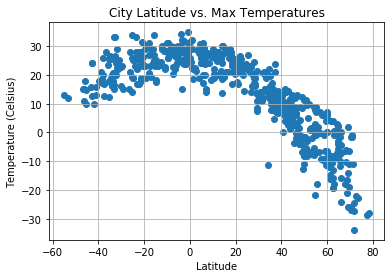

In [67]:
# Latitude vs. Temperature Plot
plt.scatter(lat, max_temp, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperatures")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

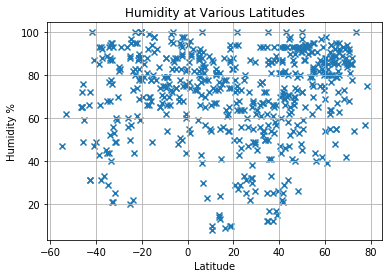

In [8]:
# Latitude vs. Humidity Plot
plt.scatter(lat, humidity, marker="x")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

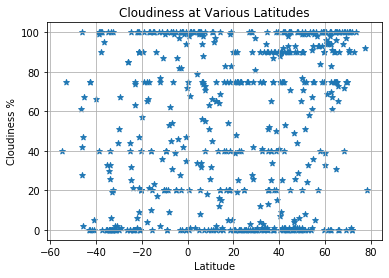

In [9]:
# Latitude vs. Temperature Plot
plt.scatter(lat, cloudiness, marker="*")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness_Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

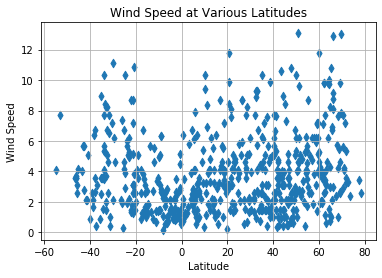

In [10]:
# Latitude vs. Wind Speed Plot
plt.scatter(lat, windspeed, marker="d")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Temperature_Plot.png")

# Show plot
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [71]:
# Create Northern and Southern Hemisphere DataFrames
northern = []
southern = []

weather_data_northern = weather_data[(weather_data['Lat'] > 0)]
weather_data_northern_df = pd.DataFrame(weather_data_northern)
weather_data_northern_df





#weather_data['lat'] = weather_data['lat'].astype(int)
#print(weather_data)

#weather_data_northern = weather_data.query("weather_data['lat'] > 0")
#print(weather_data_northern)



,Name,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
1,Thompson,5,CA,1584496677,44,55.74,-97.86,-18.00,2.60
5,Adrar,39,MR,1584496749,29,20.50,-10.07,17.57,4.64
6,Tomatlán,0,MX,1584496749,88,19.93,-105.25,20.14,0.24
7,Amet,0,IN,1584496749,25,25.30,73.93,21.71,3.91
9,Lompoc,1,US,1584496750,62,34.64,-120.46,13.00,2.60
...,...,...,...,...,...,...,...,...,...
567,Altay,44,CN,1584496867,57,47.87,88.12,1.40,0.90
568,Batagay,100,RU,1584496867,89,67.63,134.63,-17.98,2.41
569,Lunenburg,100,CA,1584496867,97,44.38,-64.32,2.22,0.45
570,Kangaatsiaq,100,GL,1584496867,69,68.31,-53.46,-10.41,7.67


In [70]:
weather_data_southern = weather_data[(weather_data['Lat'] < 0)]
weather_data_southern_df = pd.DataFrame(weather_data_southern)
weather_data_southern_df

,Name,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,East London,0,ZA,1584496681,76,-33.02,27.91,20.67,2.02
2,Cape Town,26,ZA,1584496678,88,-33.93,18.42,18.33,5.70
3,Vaini,90,TO,1584496749,83,-21.20,-175.20,27.00,2.60
4,Neuquén,40,AR,1584496749,43,-38.95,-68.06,21.00,2.60
8,Hermanus,30,ZA,1584496749,93,-34.42,19.23,17.22,1.53
...,...,...,...,...,...,...,...,...,...
540,Henties Bay,6,NA,1584496862,95,-22.12,14.28,16.67,1.34
541,Concepción del Uruguay,100,AR,1584496862,93,-32.48,-58.24,20.00,6.71
545,Jacareacanga,100,BR,1584496862,95,-6.22,-57.75,23.59,1.00
546,Puerto Madryn,0,AR,1584496863,72,-42.77,-65.04,12.65,2.75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

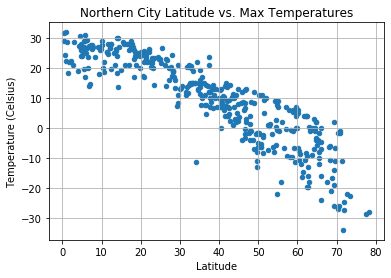

In [90]:
# Latitude vs. Temperature Plot
northern_plot = weather_data_northern_df.plot(kind='scatter',x='Lat',y='Max Temp', title= 'Northern City Latitude vs. Max Temperatures')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Temperature (Celsius)")

# slope, intercept, r_value, p_value, std_err = linregress(lat, max_temp)
# fit = slope * lat + intercept
# plt.plot(lat, fit)

plt.grid(True)


# Save the figure
plt.savefig("Northern_Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

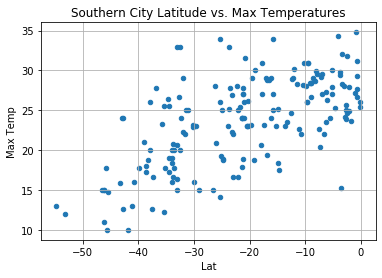

In [91]:
# Latitude vs. Temperature Plot
southern_plot = weather_data_southern_df.plot(kind='scatter',x='Lat',y='Max Temp', title= 'Southern City Latitude vs. Max Temperatures')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Temperature (Celsius)")

plt.grid(True)


# Save the figure
plt.savefig("Southern_Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

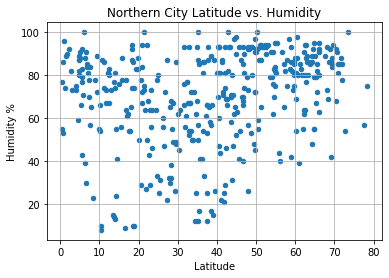

In [92]:
# Latitude vs. Temperature Plot
northern_plot = weather_data_northern_df.plot(kind='scatter',x='Lat',y='Humidity', title= 'Northern City Latitude vs. Humidity')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Humidity %")

# slope, intercept, r_value, p_value, std_err = linregress(lat, max_temp)
# fit = slope * lat + intercept
# plt.plot(lat, fit)

plt.grid(True)


# Save the figure
plt.savefig("Northern_Latitude_vs_Humidity.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Latitude vs. Temperature Plot
southern_plot = weather_data_southern_df.plot(kind='scatter',x='Lat',y='Humidity', title= 'Southern City Latitude vs. Humidity')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Humidity %")

plt.grid(True)


# Save the figure
plt.savefig("Southern_Latitude_vs_Humidity.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Latitude vs. Temperature Plot
northern_plot = weather_data_northern_df.plot(kind='scatter',x='Lat',y='Max Temp', title= 'Northern City Latitude vs. Max Temperatures')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Temperature (Celsius)")

# slope, intercept, r_value, p_value, std_err = linregress(lat, max_temp)
# fit = slope * lat + intercept
# plt.plot(lat, fit)

plt.grid(True)


# Save the figure
plt.savefig("Northern_Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Latitude vs. Temperature Plot
southern_plot = weather_data_southern_df.plot(kind='scatter',x='Lat',y='Max Temp', title= 'Southern City Latitude vs. Max Temperatures')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Temperature (Celsius)")

plt.grid(True)


# Save the figure
plt.savefig("Southern_Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Latitude vs. Temperature Plot
northern_plot = weather_data_northern_df.plot(kind='scatter',x='Lat',y='Max Temp', title= 'Northern City Latitude vs. Max Temperatures')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Temperature (Celsius)")

# slope, intercept, r_value, p_value, std_err = linregress(lat, max_temp)
# fit = slope * lat + intercept
# plt.plot(lat, fit)

plt.grid(True)


# Save the figure
plt.savefig("Northern_Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Latitude vs. Temperature Plot
southern_plot = weather_data_southern_df.plot(kind='scatter',x='Lat',y='Max Temp', title= 'Southern City Latitude vs. Max Temperatures')
northern_plot.set_xlabel("Latitude")
northern_plot.set_ylabel("Temperature (Celsius)")

plt.grid(True)


# Save the figure
plt.savefig("Southern_Latitude_vs_Temperature_Plot.png")

# Show plot
plt.show()